In [43]:
import sys
import codecs
import nltk
from nltk.corpus import stopwords

default_stopwords = set(nltk.corpus.stopwords.words('english'))

stopwords_file = './stopwords.txt'
custom_stopwords = set(codecs.open(stopwords_file, 'r', 'utf-8').read().splitlines())

all_stopwords = default_stopwords | custom_stopwords

In [44]:
text = open('topics_social_media.txt',encoding='utf-8',errors='ignore').read()

symbols=["\\",'-','``','\'\'']
words = nltk.word_tokenize(text)
words = [word for word in words if len(word) > 1]
words = [word for word in words if not word.isnumeric()]
words = [word.lower() for word in words]
words = [word for word in words if word not in all_stopwords]
words = [word for word in words if word not in symbols]

In [45]:
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(200):
    print(u'{};{}'.format(word, frequency))

media;65
social;63
facebook;27
people;18
week;13
twitter;13
news;11
tech;11
times;11
company;11
instagram;10
video;10
internet;10
president;9
trump;9
york;9
women;9
platforms;8
month;8
health;7
industry;7
tuesday;7
online;7
ago;7
political;7
readers;7
million;7
past;6
world;6
accounts;6
department;6
newsletter;6
digital;6
public;6
san;6
francisco;6
companies;6
technology;6
recently;5
information;5
started;5
friday;5
city;5
thursday;5
country;5
site;5
leaders;5
monday;5
fake;5
elections;5
wednesday;5
set;5
meme;5
chinese;5
users;5
school;5
day;5
reports;4
wrote;4
friends;4
united;4
offering;4
sign;4
sri;4
networks;4
violence;4
age;4
tell;4
presidential;4
american;4
election;4
videos;4
washington;4
china;4
popular;4
mark;4
zuckerberg;4
star;4
following;4
ban;4
money;4
london;4
joke;4
life;4
lead;4
business;4
russian;4
access;4
followers;4
south;4
services;4
sprüth;4
art;4
music;4
days;4
album;4
march;4
former;3
posts;3
teenage;3
lot;3
suicide;3
applicants;3
submit;3
policy;3
stars;3
revi

In [52]:
fq = fdist.most_common(100)
print(fq)

[('media', 65), ('social', 63), ('facebook', 27), ('people', 18), ('week', 13), ('twitter', 13), ('news', 11), ('tech', 11), ('times', 11), ('company', 11), ('instagram', 10), ('video', 10), ('internet', 10), ('president', 9), ('trump', 9), ('york', 9), ('women', 9), ('platforms', 8), ('month', 8), ('health', 7), ('industry', 7), ('tuesday', 7), ('online', 7), ('ago', 7), ('political', 7), ('readers', 7), ('million', 7), ('past', 6), ('world', 6), ('accounts', 6), ('department', 6), ('newsletter', 6), ('digital', 6), ('public', 6), ('san', 6), ('francisco', 6), ('companies', 6), ('technology', 6), ('recently', 5), ('information', 5), ('started', 5), ('friday', 5), ('city', 5), ('thursday', 5), ('country', 5), ('site', 5), ('leaders', 5), ('monday', 5), ('fake', 5), ('elections', 5), ('wednesday', 5), ('set', 5), ('meme', 5), ('chinese', 5), ('users', 5), ('school', 5), ('day', 5), ('reports', 4), ('wrote', 4), ('friends', 4), ('united', 4), ('offering', 4), ('sign', 4), ('sri', 4), ('n

In [53]:
import pandas as pd

name = ['keywords','frequency']
wordfrequency = pd.DataFrame(columns=name, data=fq)
print(wordfrequency)
wordfrequency.to_csv('/Users/wangqile/wf.csv', encoding='utf-8')

      keywords  frequency
0        media         65
1       social         63
2     facebook         27
3       people         18
4         week         13
5      twitter         13
6         news         11
7         tech         11
8        times         11
9      company         11
10   instagram         10
11       video         10
12    internet         10
13   president          9
14       trump          9
15        york          9
16       women          9
17   platforms          8
18       month          8
19      health          7
20    industry          7
21     tuesday          7
22      online          7
23         ago          7
24   political          7
25     readers          7
26     million          7
27        past          6
28       world          6
29    accounts          6
..         ...        ...
70    election          4
71      videos          4
72  washington          4
73       china          4
74     popular          4
75        mark          4
76  zuckerbe

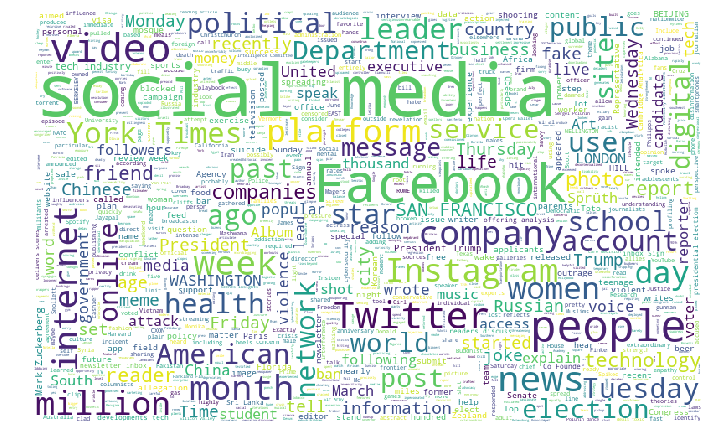

In [50]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud

f = open('topics_social_media.txt','r').read()
mask = np.array(Image.open('AddictedPhoneCovers.jpg'))
wc = wordcloud.WordCloud(mode='RGBA',background_color="white",max_words=3000,stopwords=all_stopwords, max_font_size=300,random_state=42,mask=mask).generate(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis("off")
plt.show()